In [1]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [2]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [3]:
# 신경망 구조
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512,activation = 'relu',input_shape=(28*28,)),
    layers.Dense(10,activation = 'softmax')
])

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [5]:
#모델 훈련
import tensorflow as tf
model.compile(optimizer='Adam',loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2640 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1081 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0515 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0363 - accuracy: 0.9895


In [6]:
# 모델 예측
import numpy as np
x_test10 = x_test[:10]
predction = model.predict(x_test10)
np.argmax(predction[0])

7

In [7]:
y_test[0]

7

In [8]:
predction[0][7]

0.9976427

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 996us/step - loss: 0.0631 - accuracy: 0.9794


[0.0631118193268776, 0.9793999791145325]

In [10]:
# 평가 교차알고리즘 KFold
from sklearn.model_selection import KFold

In [11]:
accuracy = []
for tindex, vindex in  KFold().split(x_train):
    x_tr,x_val =  x_train[tindex],x_train[vindex]
    y_tr,y_val =  y_train[tindex],y_train[vindex]
    
    model = keras.Sequential([
        layers.Dense(512,activation = 'relu',input_shape=(28*28,)),
        layers.Dense(10,activation = 'softmax')
    ])
    model.compile(optimizer='Adam',loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=['accuracy'])
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    accuracy.append( model.evaluate(x_test,y_test)[1])    

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2730 - accuracy: 0.9221
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1104 - accuracy: 0.9672
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9808
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2662 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1088 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9781
Epoch 1/5


In [12]:
np.array(accuracy).mean()

0.979799997806549

In [13]:
# 신경망에서 사용하는 데이터
# 스칼라(랭크-0 텐서)
x = np.array(12)
x.shape, x, x.ndim

((), array(12), 0)

In [14]:
# 벡터(랭크-1 텐서)
x = np.array([1,2,3,4])
x, x.shape, x.ndim

(array([1, 2, 3, 4]), (4,), 1)

In [15]:
# 행렬(랭크-2 텐서)
x = np.array([[1,2,3,4],[1,2,3,4]])
x, x.shape, x.ndim

(array([[1, 2, 3, 4],
        [1, 2, 3, 4]]),
 (2, 4),
 2)

In [16]:
# 랭크-3 텐서
x = np.array([[[1,2,3,4],[1,2,3,4]],[[1,2,3,4],[1,2,3,4]]])
x, x.shape, x.ndim

(array([[[1, 2, 3, 4],
         [1, 2, 3, 4]],
 
        [[1, 2, 3, 4],
         [1, 2, 3, 4]]]),
 (2, 2, 4),
 3)

In [17]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train.ndim

3

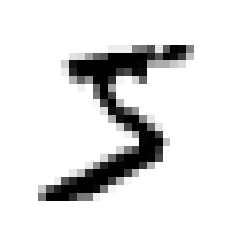

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray_r')
plt.axis('off')
plt.show()

In [19]:
y_train[0]

5

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train10 = x_train[:10]
x_train10.shape

(10, 28, 28)

In [22]:
x_train10 = x_train[:10,:,:]
x_train10.shape

(10, 28, 28)

In [23]:
x_train10 = x_train[:10,:14,:14]
x_train10.shape

(10, 14, 14)

In [24]:
x_train10 = x_train[:10,:-10,:-10]
x_train10.shape

(10, 18, 18)

In [25]:
# 배치 개념
batch = x_train[:128]
batch.shape

(128, 28, 28)

In [26]:
batch = x_train[128:128*2]
batch.shape

(128, 28, 28)

In [27]:
n = 3
batch = x_train[128*n:128*(n+1)]

In [28]:
# 신경망이 학습한 모든 변환을  수치 데이터 텐서에 적용하는 텐서 연산으로 나타낼수 있다
# 케라스의 층은
# tf.keras.layers.Dense(512,activation='relu')
# output = relu(dot(w,input) + b)

In [29]:
x = np.array([[-2,-1,0,1,2],[1,1,1,1,1]])

In [30]:
# 원소별 연산
def naive_relu(x):
    assert len(x.shape) == 2  
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

In [31]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,y]
    return x
import time
x = np.random.random((20,100))
y = np.random.random((20,100))
t0 = time.time()
for i in range(1000):
    z = x + y
    z = np.maximum(z,0)
print(f"걸린시간 {time.time()-t0}")    

걸린시간 0.0


In [32]:
for i in range(1000):
    z = x + y
    z = naive_relu(z)
print(f"걸린시간 {time.time()-t0}")    

걸린시간 0.9744362831115723


In [33]:
# 브로드 캐스팅
import numpy as np
x = np.random.random((32,10))
y = np.random.random((10,))
y = np.expand_dims(y, axis=0)
# y.shape
y

array([[0.10901446, 0.04285068, 0.05137637, 0.08437423, 0.02898823,
        0.27317982, 0.9067236 , 0.12003286, 0.26500255, 0.1574388 ]])

In [34]:
y = np.concatenate([y]*32,axis = 0)

In [35]:
x.shape, y.shape

((32, 10), (32, 10))

In [36]:
#브로드 케스팅
def niave_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2    
    assert len(x.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [37]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)
x.shape, y.shape, z.shape

((64, 3, 32, 10), (32, 10), (64, 3, 32, 10))

In [38]:
x.shape, y.shape

((64, 3, 32, 10), (32, 10))

In [39]:
x = np.array([10,20])
y = np.array([2,3])
x, y

(array([10, 20]), array([2, 3]))

In [40]:
np.dot(x,y)

80

In [41]:
# 내적연산 dot  각 요소들끼리 곱한 결과를 합
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0
    for i in range(x.shape[0]):
        z += x[i]*y[i]
    return z

In [42]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in ranage(x.shape[1]):
            z[i] += x[i,j]*y[j] 
    return z

In [43]:
x = np.array([[1,2],[3,4]])
y = np.array([2,3])
x.shape, y.shape

((2, 2), (2,))

In [44]:
def naive_matrix_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:],y)
    return z

In [45]:
x = np.array([[1,2],[3,4]])
y = np.array([[1,2],[3,4]])
np.dot(x,y)

array([[ 7, 10],
       [15, 22]])

In [46]:
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], x.shape[1]) )
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            col_y = y[:,j]
            z[i,j] =  naive_vector_dot(row_x, col_y)
    return z

In [47]:
x_train.shape

(60000, 28, 28)

In [48]:
x_train.reshape(x_train.shape[0],-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [49]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x

array([[0., 1.],
       [2., 3.],
       [4., 5.]])

In [50]:
x.reshape(-1,1)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [51]:
x = np.zeros((300,20))
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
x.T.shape

(20, 300)

In [53]:
# 그레이디언트 기반 최적화
import tensorflow as tf
x = tf.Variable(0.)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [54]:
# 그레이디언트 테이프  주어진 입력변수.. 데이터어 대해서 자동 미분
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2*x+3   
grad_of_y_wrt_x = tape.gradient(x,y)    

In [55]:
x = tf.Variable(tf.zeros((2,2)))
with tf.GradientTape() as tape:
    y = 2*x+3   
grad_of_y_wrt_x = tape.gradient(x,y)  

In [56]:
temp = tf.random.uniform([10],0,1)
temp

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.68310297, 0.24645591, 0.9941987 , 0.63897467, 0.75776887,
       0.18510163, 0.5184624 , 0.07834172, 0.8641641 , 0.2943046 ],
      dtype=float32)>